<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/TwitterDegree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, we will analyze a few properties of a subgraph of Twitter/X.
I already saved the DiGraph object from a previous notebook, so I start by loading it...

In [1]:
from google.colab import drive
drive.mount('/content/drive') # You will need to give Google Colab access to your Google Drive after running this line

# Replace the string below with the path of your file in Google Drive
file_path = '/content/drive/My Drive/ColabNotebooks/TwitterSmall.graphml'

Mounted at /content/drive


In [2]:
import networkx as nx
X = nx.read_graphml(file_path)

Once we have the DiGraph object X in memory, let's compute the in- and out-degree sequences of the Digraph...

In [3]:
in_degrees = X.in_degree()  # Returns a DegreeView object with node and in-degree
out_degrees = X.out_degree()  # Returns a DegreeView object with node and out-degree

# To get the degree sequences as lists:
in_degree_sequence = [d for n, d in in_degrees]
out_degree_sequence = [d for n, d in out_degrees]

Let's plot two histograms for the values of the in- and out-degrees...

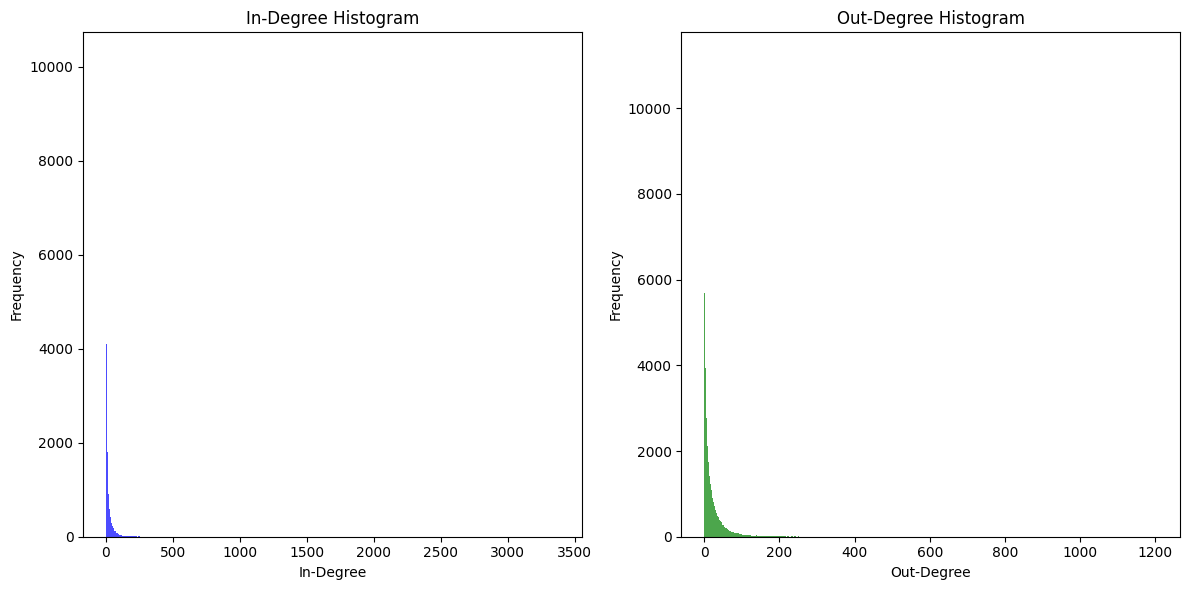

In [5]:
import matplotlib.pyplot as plt

# Plotting the in-degree histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(in_degree_sequence, bins=max(in_degree_sequence)-min(in_degree_sequence), color='blue', alpha=0.7)
plt.title('In-Degree Histogram')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

# Plotting the out-degree histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(out_degree_sequence, bins=max(out_degree_sequence)-min(out_degree_sequence), color='green', alpha=0.7)
plt.title('Out-Degree Histogram')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Notice how most people have low in- and out-degrees, but the histogram is very skew towards high degrees (similar to the distribution of wealth in a capitalist society)...

When the range of values of a variable (degree) is very large, it is convenient to plot a scatter plot of the Degrees vs the Frequencies in log-log scale......

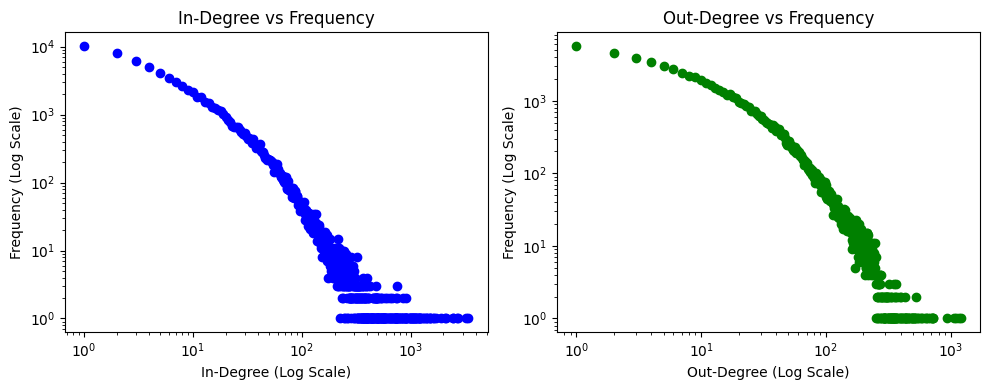

In [9]:
import numpy as np
from collections import Counter

# Function to calculate degree frequencies
def calculate_frequencies(degree_sequence):
    # Count the frequency of each degree
    degree_counts = Counter(degree_sequence)
    # Filter out zero degrees
    filtered_degrees = {deg: count for deg, count in degree_counts.items() if deg > 0}
    degrees = np.array(list(filtered_degrees.keys()))
    frequencies = np.array(list(filtered_degrees.values()))
    return degrees, frequencies

# Calculate frequencies for in-degrees and out-degrees
in_degrees, in_frequencies = calculate_frequencies(in_degree_sequence)
out_degrees, out_frequencies = calculate_frequencies(out_degree_sequence)

# Plotting
plt.figure(figsize=(10, 4))

# Scatter plot for in-degrees
plt.subplot(1, 2, 1)
plt.scatter(in_degrees, in_frequencies, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.title('In-Degree vs Frequency')
plt.xlabel('In-Degree (Log Scale)')
plt.ylabel('Frequency (Log Scale)')

# Scatter plot for out-degrees
plt.subplot(1, 2, 2)
plt.scatter(out_degrees, out_frequencies, color='green')
plt.xscale('log')
plt.yscale('log')
plt.title('Out-Degree vs Frequency')
plt.xlabel('Out-Degree (Log Scale)')
plt.ylabel('Frequency (Log Scale)')

plt.tight_layout()
plt.show()

Let's move on and check if popular individuals in the social network (those with many followers) connect to other popular individuals. To answer this question, we can look at the correlation between the in-degrees of connected individuals.
For each directed edge (i->j), we compare the in-degree of i (the follower) with the in-degree of j (the followed). We are interested in whether high in-degree nodes are more likely to follow other high in-degree nodes...

<ipython-input-10-e705caf8144f>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_edges = random.sample(X.edges(), 1000)


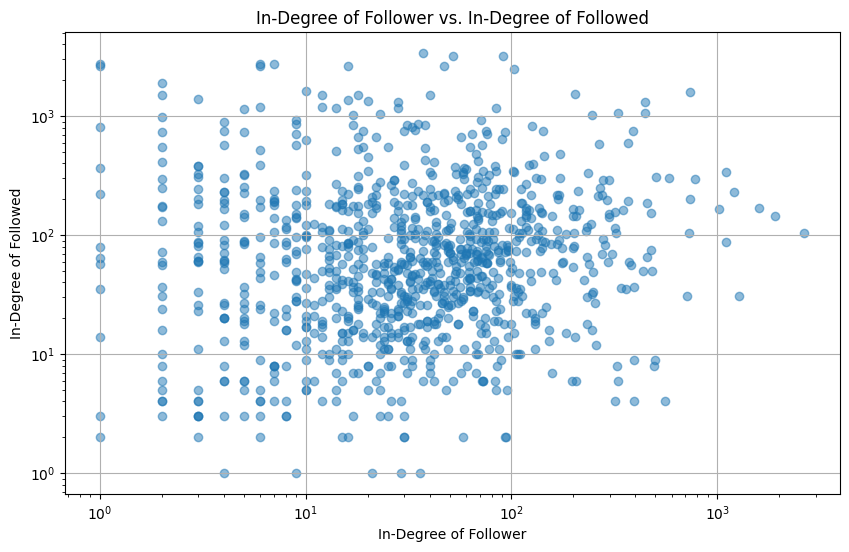

In [10]:
import random
# Select 1000 edges randomly
random_edges = random.sample(X.edges(), 1000)

# Extract in-degrees for followers (source) and followed (target)
follower_in_degrees = [X.in_degree(edge[0]) for edge in random_edges]
followed_in_degrees = [X.in_degree(edge[1]) for edge in random_edges]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(follower_in_degrees, followed_in_degrees, alpha=0.5)
plt.title('In-Degree of Follower vs. In-Degree of Followed')
plt.xlabel('In-Degree of Follower')
plt.ylabel('In-Degree of Followed')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()